# Ab Initio Thermodynamics (Pt$_2$O$_x$)



$
E_{form} (Pt_xO_y) = E(Pt_xO_y)-E(Pt_x)-\dfrac{1}{2}yE(O_2)
$

$
\Delta G(T,p) \approx \ E_{form}(Pt_xO_y) - y \ \Delta \mu_O(T,p)
$

$
\Delta \mu_O (T,p) = \mu_O(T,p) - \dfrac{1}{2}E(O_2)
$

$
\mu_O(T,p) = \mu_O(T,p^0) + \dfrac{1}{2}  k T \ log(p/p^0)
$

In [21]:
import numpy as np
import matplotlib.pyplot as plt 
from ase.thermochemistry import IdealGasThermo
from ase.io import read

In [22]:
# Experimental data

data = np.array(np.loadtxt("O2_JANAF_0-1000.txt",dtype=np.float64, skiprows=2))
T = data[:,0]
S = data[:,2]*1.0364E-5
dH = data[:,4]
dH_zero = (dH-dH[0])*0.01036427230133138
G = (dH_zero - T*S)/2

In [23]:
# interpolating the experimental values

G3 = np.linspace(G[2],G[3],50, endpoint=False)
G4 = np.linspace(G[3],G[5],50, endpoint=False)
G5 = np.linspace(G[5],G[6],50, endpoint=False)
G6 = np.linspace(G[6],G[7],50, endpoint=False)
G7 = np.linspace(G[7],G[8],50, endpoint=False)
G8 = np.linspace(G[8],G[9],50, endpoint=False)
G9 = np.linspace(G[9],G[10],100, endpoint=False)
G10 = np.linspace(G[10],G[11],100, endpoint=False)
G11 = np.linspace(G[11],G[12],100, endpoint=False)
G12 = np.linspace(G[12],G[13],100, endpoint=False)
G13 = np.linspace(G[13],G[14],101)

G_O2 = np.concatenate((G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13))

# Temperatures
T = np.linspace(200,1000,801)

# pressure values
p = np.logspace(-12, 0, num=1001)

In [24]:
def mu_O(p,T,G):
    k = 8.61733262e-05  # in eV
    p0 = 1   # bar
    p_part = 0.5*k*T*np.log(p/p0)
    mu_O = G + p_part
    return mu_O


In [25]:
# Total energies from DFT calculations (PBE/PAW)

E_O2 = -9.86450898
E_Pt2 = -4.91635487
E_Pt2O1 = -11.36464802
E_Pt2O2 = -18.49769161
E_Pt2O3 = -24.82390554
E_Pt2O4 = -30.35419064

In [26]:
# Pt2 

Pt2_atoms = read(r"Pt2.vasp")
Pt2_vibs = np.array([235.194746])  # vibrations
Pt2_vib_energies = Pt2_vibs / 8065.54429  # convert to eV from cm^-1
Pt2_thermo = IdealGasThermo(vib_energies=Pt2_vib_energies,
                        atoms=Pt2_atoms,
                        geometry='linear',
                        symmetrynumber=2, spin=1)

G_Pt2 = []
for i in range(len(T)):  # runs on temperatures
    for j in range(len(p)):  # runs on pressures
        G = Pt2_thermo.get_gibbs_energy(temperature=T[i], pressure=p[j], verbose=False)
        G_Pt2.append(G)


In [27]:
# Pt2O1 

Pt2O1_atoms = read(r"Pt2O1.vasp")
Pt2O1_vibs = np.array([853.579219, 233.514075,81.814339]) #Vibrations
Pt2O1_vib_energies = Pt2O1_vibs / 8065.54429  # convert to eV from cm^-1
Pt2O1_thermo = IdealGasThermo(vib_energies=Pt2O1_vib_energies,
                        atoms=Pt2O1_atoms,
                        geometry='nonlinear',
                        symmetrynumber=1, spin=1)

G_Pt2O1 = []
for i in range(len(T)):  # runs on temperatures
    for j in range(len(p)):  # runs on pressures
        G = Pt2O1_thermo.get_gibbs_energy(temperature=T[i], pressure=p[j], verbose=False)
        G_Pt2O1.append(G)


In [28]:
# Pt2O2 

Pt2O2_atoms = read(r"Pt2O2.vasp")
Pt2O2_vibs = np.array([897.876707,
                       733.133139,
                       560.064989,
                       190.872897,
                       145.629593,
                       128.346115])
Pt2O2_vib_energies = Pt2O2_vibs / 8065.54429  # convert to eV from cm^-1
Pt2O2_thermo = IdealGasThermo(vib_energies=Pt2O2_vib_energies,
                        atoms=Pt2O2_atoms,
                        geometry='nonlinear',
                        symmetrynumber=1, spin=0)

G_Pt2O2 = []
for i in range(len(T)):  # runs on temperatures
    for j in range(len(p)):  # runs on pressures
        G = Pt2O2_thermo.get_gibbs_energy(temperature=T[i], pressure=p[j], verbose=False)
        G_Pt2O2.append(G)

In [29]:
# Pt2O3 

Pt2O3_atoms = read(r"Pt2O3.vasp")
Pt2O3_vibs = np.array([881.567672,
                       829.116228,
                       755.575515,
                       433.284995,
                       240.489622,
                       169.161925,
                       138.749050,
                       119.145784,
                       98.731801])
Pt2O3_vib_energies =  Pt2O3_vibs / 8065.54429  # convert to eV from cm^-1
Pt2O3_thermo = IdealGasThermo(vib_energies=Pt2O3_vib_energies,
                        atoms=Pt2O3_atoms,
                        geometry='nonlinear',
                        symmetrynumber=2, spin=1)

G_Pt2O3 = []
for i in range(len(T)):  # runs on temperatures
    for j in range(len(p)):  # runs on pressures
        G = Pt2O3_thermo.get_gibbs_energy(temperature=T[i], pressure=p[j], verbose=False)
        G_Pt2O3.append(G)

In [31]:
# Pt2O4 

Pt2O4_atoms = read(r"Pt2O4.vasp")
Pt2O4_vibs = np.array([899.567861,
                       879.232294,
                       675.953029,
                       565.802740,
                       507.999674,
                       445.915778,
                       282.607450,
                       224.235997,
                       180.296472,
                       142.752434,
                       130.952672,
                       96.099011])
Pt2O4_vib_energies = Pt2O4_vibs / 8065.54429  # convert to eV from cm^-1
Pt2O4_thermo = IdealGasThermo(vib_energies=Pt2O4_vib_energies,
                        atoms=Pt2O4_atoms,
                        geometry='nonlinear',
                        symmetrynumber=2, spin=1)

G_Pt2O4 = []
for i in range(len(T)):  # runs on temperatures
    for j in range(len(p)):  # runs on pressures
        G = Pt2O4_thermo.get_gibbs_energy(temperature=T[i], pressure=p[j], verbose=False)
        G_Pt2O4.append(G)

In [32]:
# pT and oxygen potential

pT = []
for i in range(len(T)):  # runs on temperatures
    for j in range(len(p)):  # runs on pressures
        ji = [p[j],T[i]]
        pT.append(ji)

potential_oxygen = []
for i in range(len(T)):  # runs on temperatures
    for j in range(len(p)):  # runs on pressures
        potential_ith = mu_O(p[j],T[i],G_O2[i])
        potential_oxygen.append(potential_ith)

In [33]:
omega_Pt2O1 = []
for k in range(len(pT)): 
    omega_cluster = (E_Pt2O1 + G_Pt2O1[k]) - (E_Pt2 + G_Pt2[k]) - (1*(potential_oxygen[k] + 0.5*E_O2))
    omega_Pt2O1.append(omega_cluster)

omega_Pt2O2 = []
for k in range(len(pT)): 
    omega_cluster = (E_Pt2O2 + G_Pt2O2[k]) - (E_Pt2 + G_Pt2[k]) - (2*(potential_oxygen[k] + 0.5*E_O2))
    omega_Pt2O2.append(omega_cluster)

omega_Pt2O3 = []
for k in range(len(pT)): 
    omega_cluster = (E_Pt2O3 + G_Pt2O3[k]) - (E_Pt2 + G_Pt2[k]) - (3*(potential_oxygen[k] + 0.5*E_O2))
    omega_Pt2O3.append(omega_cluster)
    
omega_Pt2O4 = []
for k in range(len(pT)): 
    omega_cluster = (E_Pt2O4 + G_Pt2O4[k]) - (E_Pt2 + G_Pt2[k]) - (4*(potential_oxygen[k] + 0.5*E_O2))
    omega_Pt2O4.append(omega_cluster)

        
# Pt2
omega_Pt2 = np.zeros(len(omega_Pt2O4))

In [34]:
# Comparison 

min_Pt2 = []
min_Pt2O1 = []
min_Pt2O2 = []
min_Pt2O3 = []
min_Pt2O4 = []

for k in range(len(omega_Pt2)):
    omega_cluster = [omega_Pt2[k],omega_Pt2O1[k],omega_Pt2O2[k],omega_Pt2O3[k],omega_Pt2O4[k]]
    min_cluster = omega_cluster.index(min(omega_cluster))
    if min_cluster == 0:
        min_Pt2.append(pT[k])
    elif min_cluster == 1:
        min_Pt2O1.append(pT[k])
    elif min_cluster == 2:
        min_Pt2O2.append(pT[k])
    elif min_cluster == 3:
        min_Pt2O3.append(pT[k])
    elif min_cluster == 4:
        min_Pt2O4.append(pT[k])

In [35]:
p_Pt2 = [row[0] for row in min_Pt2]
T_Pt2 = [row[1] for row in min_Pt2]

p_Pt2O1 = [row[0] for row in min_Pt2O1]
T_Pt2O1 = [row[1] for row in min_Pt2O1]

p_Pt2O2 = [row[0] for row in min_Pt2O2]
T_Pt2O2 = [row[1] for row in min_Pt2O2]

p_Pt2O3 = [row[0] for row in min_Pt2O3]
T_Pt2O3 = [row[1] for row in min_Pt2O3]

p_Pt2O4 = [row[0] for row in min_Pt2O4]
T_Pt2O4 = [row[1] for row in min_Pt2O4]

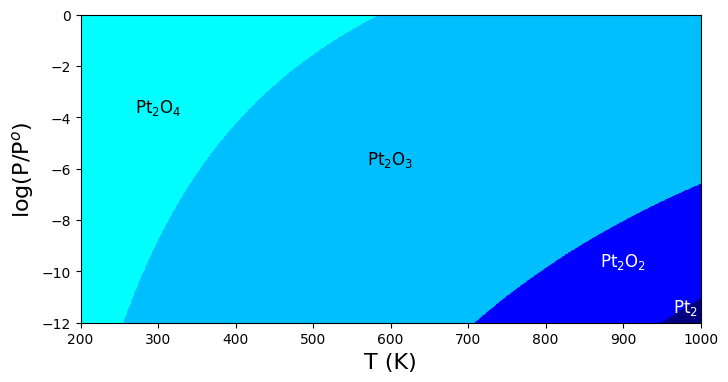

In [40]:
fig = plt.figure(figsize=(8,4))

plt.plot(T_Pt2,np.log10(p_Pt2),'.', color='navy', label='Pt$_2$',markersize=2)
plt.plot(T_Pt2O1,np.log10(p_Pt2O1),'.', color='crimson', label='Pt$_2$O$_1$',markersize=2)
plt.plot(T_Pt2O2,np.log10(p_Pt2O2),'.', color='blue', label='Pt$_2$O$_2$',markersize=2)
plt.plot(T_Pt2O3,np.log10(p_Pt2O3),'.', color='deepskyblue', label='Pt$_2$O$_3$',markersize=2)
plt.plot(T_Pt2O4,np.log10(p_Pt2O4),'.', color='cyan', label='Pt$_2$O$_4$',markersize=2)

plt.xlim((200,1000))
plt.ylim((-12,0))
plt.xlabel('T (K)', weight = 'normal', size = 16)
plt.ylabel('log(P/P$^o$)', weight = 'normal', size = 16)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1.01),prop={'size': 14})

plt.annotate('Pt$_2$O$_4$',xy=(400,-2), xytext=(300,-4),horizontalalignment='center', verticalalignment='bottom',size=12)
plt.annotate('Pt$_2$O$_3$',xy=(400,-2), xytext=(600,-6),horizontalalignment='center', verticalalignment='bottom',size=12)
plt.annotate('Pt$_2$O$_2$',xy=(400,-2), xytext=(900,-10),horizontalalignment='center', verticalalignment='bottom',size=12,color='white')
plt.annotate('Pt$_2$',xy=(400,-2), xytext=(980,-11.8),horizontalalignment='center', verticalalignment='bottom',size=12,color='white')

plt.savefig('PT_Pt2Ox_Thermo.jpg',dpi=1200,bbox_inches='tight' )
plt.show()